### Linear Regression on AQI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real_Data/Real_Combine.csv')



In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


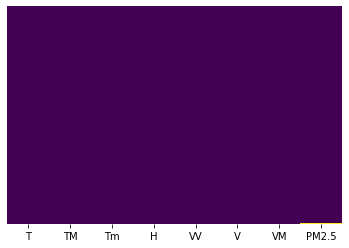

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
total_nan = 0
for miss in df.isnull().sum():
    total_nan += miss

In [6]:
total_nan

2

In [7]:
df=df.dropna()

In [8]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [9]:
## check null values
X.isnull()

,T,TM,Tm,H,VV,V,VM
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1099,False,False,False,False,False,False,False
1100,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False


In [10]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1099    False
1100    False
1101    False
1102    False
1103    False
Name: PM2.5, Length: 1103, dtype: bool

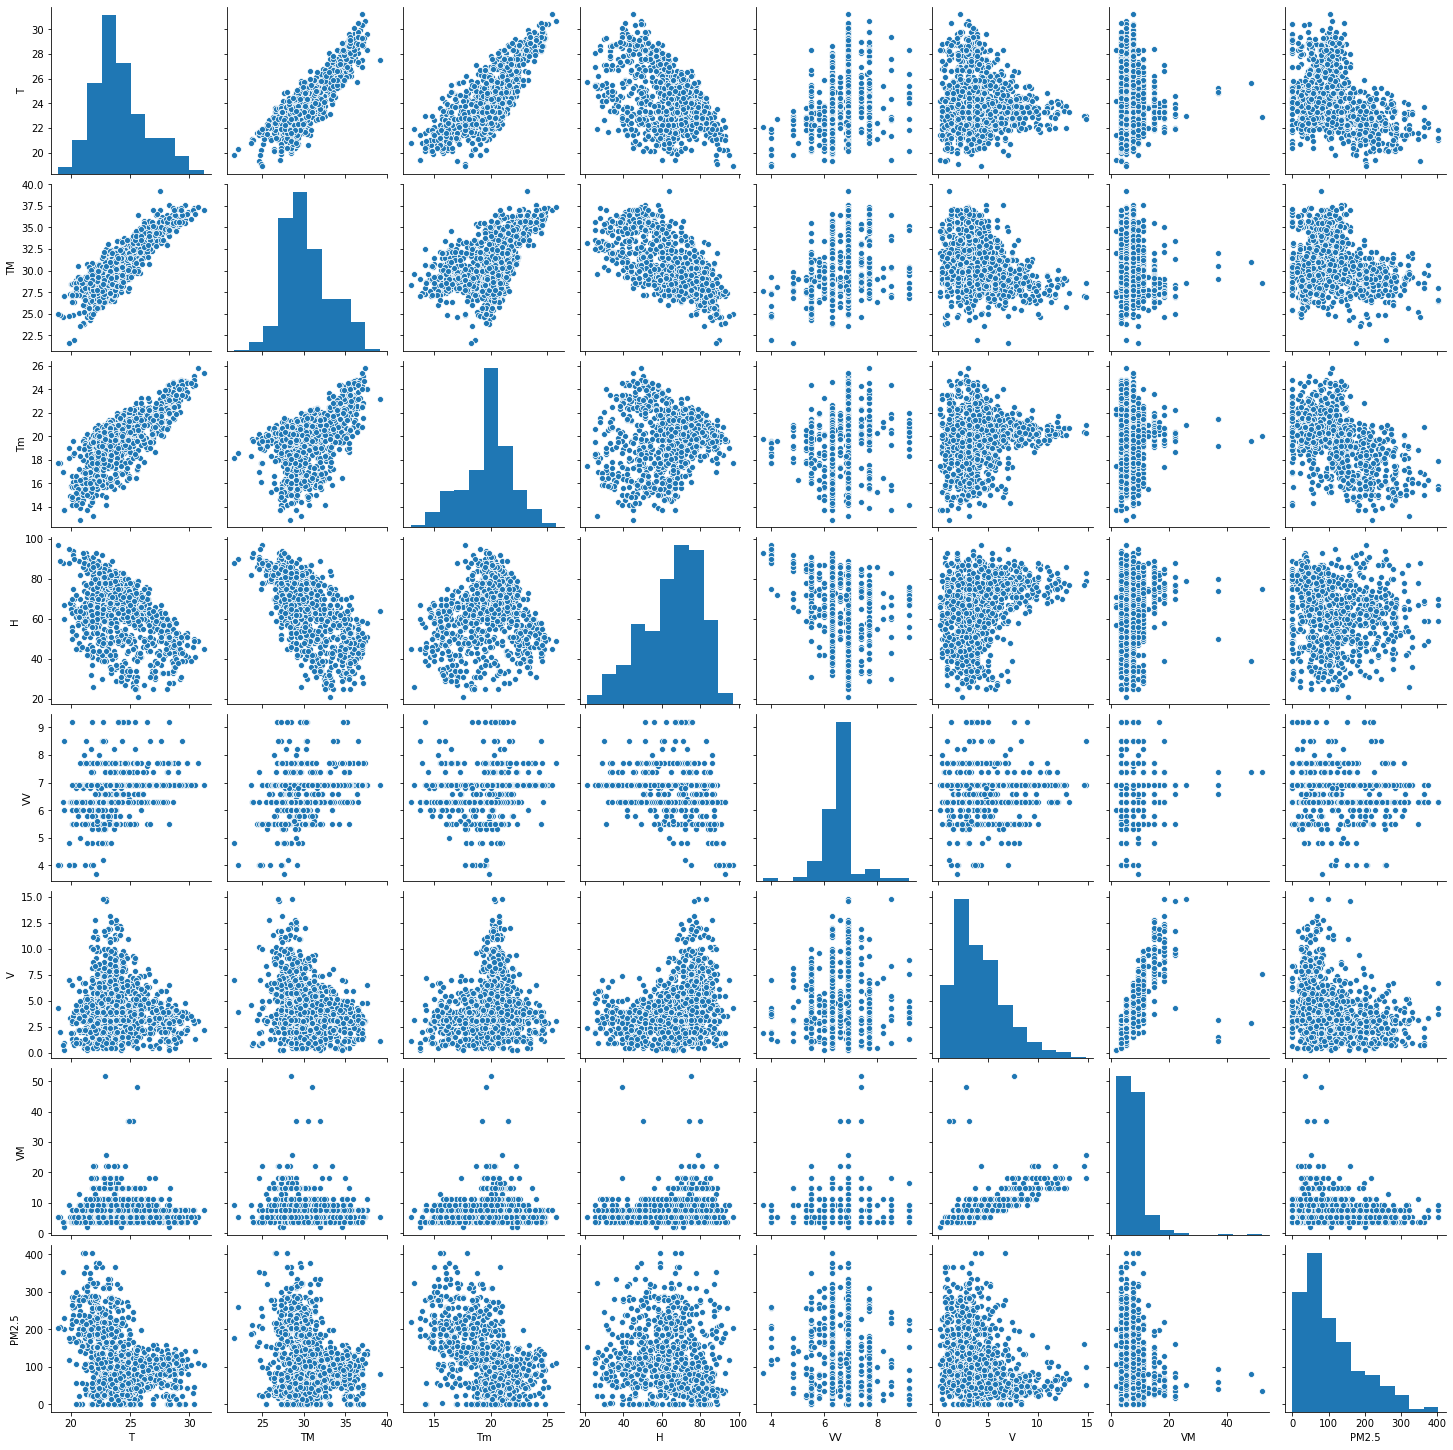

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


In [13]:
corrmat = df.corr()

In [14]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM2.5'], dtype='object')

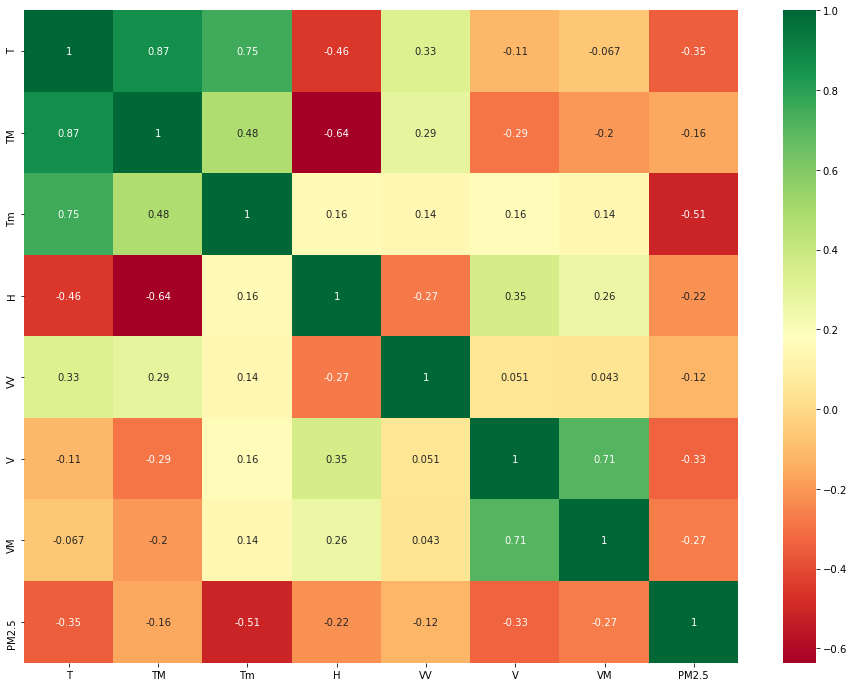

In [15]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
fig = plt.figure(figsize=(16,12))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig.savefig('output/Correlation.png',dpi=300)

In [16]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM2.5'], dtype='object')

### Feature Importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
feat_imp = ExtraTreesRegressor()
feat_imp.fit(X,y)

ExtraTreesRegressor()

In [18]:
X.head()

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4


In [19]:
print(feat_imp.feature_importances_)

[0.1865368  0.10839313 0.30169869 0.12805598 0.06769371 0.13853353
 0.06908817]


In [20]:
print(X.columns)

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM'], dtype='object')


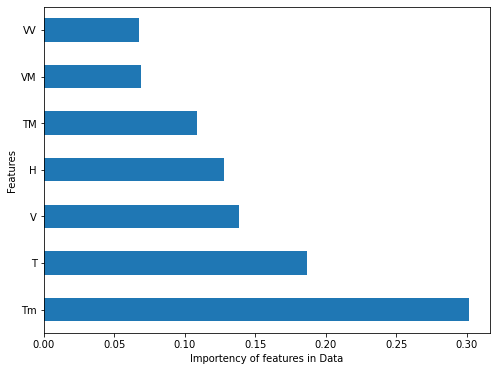

In [21]:

#plot graph of feature importances for better visualization
fig = plt.figure(figsize = (8,6))
feat_importances = pd.Series(feat_imp.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Importency of features in Data')
plt.show()
fig.savefig('output/feature_importence.png',dpi=300)

### By looking at correlation matrix , we can say that T is very positively related with Tm and TM so may be we can remove this features but remember it is also importence features in features importence matrix

In [22]:
X.drop(labels = 'T',axis=1,inplace = True)

/home/azhad56/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Linear Regression

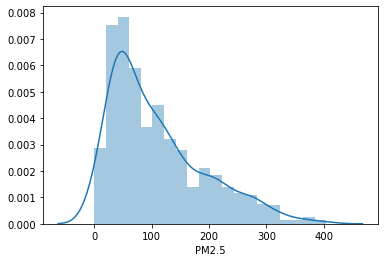

In [23]:
sns.distplot(y)

### Train Test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X_train.to_csv('Data/Train_Test/X_train.csv',index = False)
y_train.to_csv('Data/Train_Test/y_train.csv',index = False)
X_test.to_csv('Data/Train_Test/X_test.csv',index = False)
y_test.to_csv('Data/Train_Test/y_test.csv',index = False)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
regressor.coef_

array([ -7.22031168, -11.43431097,  -1.29567113,  -7.74329616,
        -8.05050902,  -0.88386091])

In [29]:
regressor.intercept_

731.000970208107

In [30]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.35518833158273777


In [31]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3221614521515055


In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [33]:
score.mean()

0.2884876766936866

#### Model Evaluation

In [34]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TM,-7.220312
Tm,-11.434311
H,-1.295671
VV,-7.743296
V,-8.050509
VM,-0.883861


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [35]:
prediction=regressor.predict(X_test)

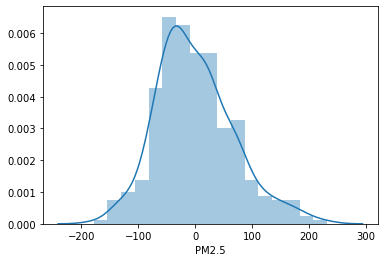

In [36]:
sns.distplot(y_test-prediction)

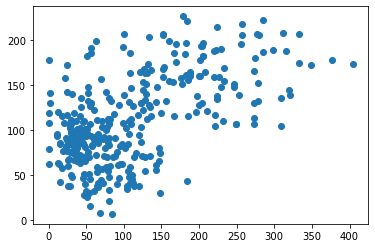

In [37]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 53.7451736015648
MSE: 4624.325168098146
RMSE: 68.00239089986576


In [40]:
import pickle 

In [41]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)
file.close()